In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import time

plt.style.use("ggplot")

%matplotlib inline

In [115]:
G100 = nx.gnm_random_graph(100, 500, directed=True)
for (u,v,w) in G100.edges(data=True):
    w["weight"] = np.random.randint(1, 10)

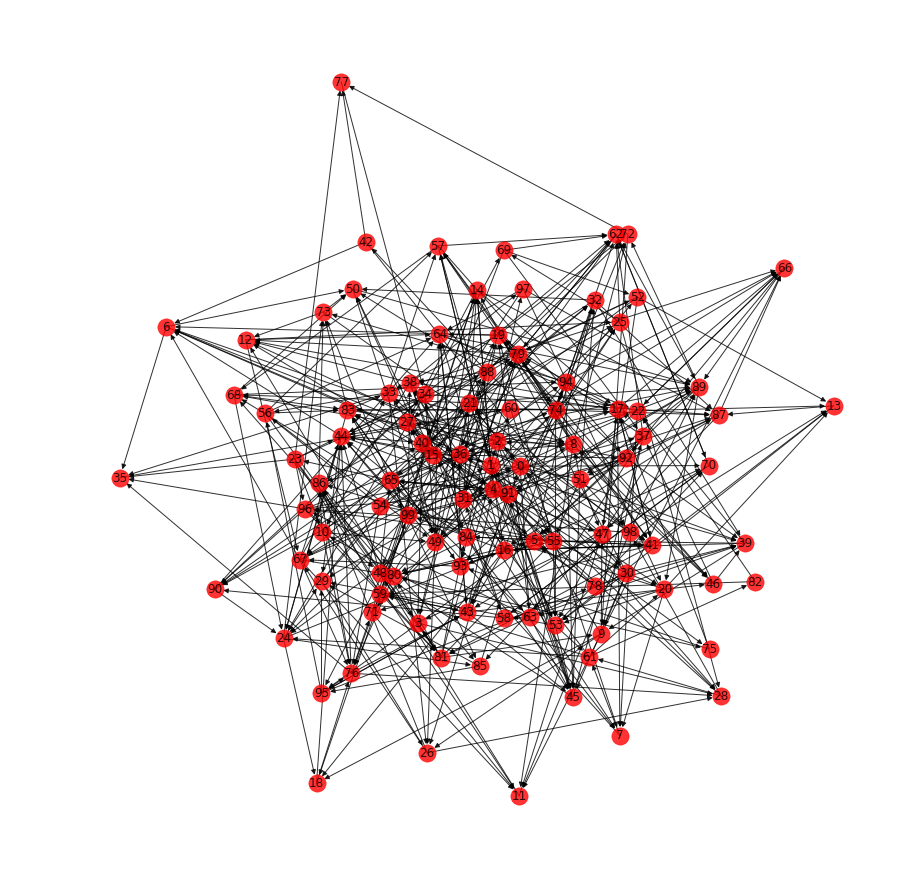

In [87]:
plt.figure(figsize=(12,12))

nx.draw(G100, 
        with_labels=True,
        alpha=0.8)
plt.show()

In [89]:
G100.edges(data=True)

OutEdgeDataView([(0, 25, {'weight': 8}), (0, 55, {'weight': 2}), (0, 70, {'weight': 7}), (0, 12, {'weight': 1}), (0, 21, {'weight': 6}), (0, 41, {'weight': 4}), (0, 24, {'weight': 6}), (0, 63, {'weight': 9}), (1, 2, {'weight': 7}), (1, 16, {'weight': 3}), (1, 53, {'weight': 9}), (1, 45, {'weight': 7}), (1, 6, {'weight': 5}), (1, 57, {'weight': 7}), (1, 14, {'weight': 1}), (1, 28, {'weight': 3}), (1, 89, {'weight': 5}), (2, 45, {'weight': 9}), (2, 6, {'weight': 5}), (2, 55, {'weight': 7}), (2, 67, {'weight': 2}), (2, 28, {'weight': 1}), (2, 22, {'weight': 9}), (2, 68, {'weight': 3}), (2, 66, {'weight': 5}), (2, 36, {'weight': 7}), (3, 81, {'weight': 4}), (3, 12, {'weight': 9}), (3, 28, {'weight': 5}), (3, 88, {'weight': 4}), (4, 33, {'weight': 3}), (4, 14, {'weight': 1}), (4, 65, {'weight': 8}), (4, 12, {'weight': 3}), (4, 45, {'weight': 3}), (4, 87, {'weight': 7}), (4, 75, {'weight': 2}), (5, 95, {'weight': 6}), (5, 40, {'weight': 7}), (5, 70, {'weight': 1}), (5, 32, {'weight': 8}), (5

In [90]:
G100.is_directed()

True

In [91]:
nx.is_weighted(G100)

True

In [92]:
G100.adj[0]

AtlasView({25: {'weight': 8}, 55: {'weight': 2}, 70: {'weight': 7}, 12: {'weight': 1}, 21: {'weight': 6}, 41: {'weight': 4}, 24: {'weight': 6}, 63: {'weight': 9}})

In [112]:
def initiation(graph, start):
    nx.set_node_attributes(G100, np.NAN, "parent")
    nx.set_node_attributes(G100, np.inf, "discovery")
    graph.nodes[start]["discovery"] = 0
    return graph

In [95]:
G100.nodes[0]["parent"]

nan

In [97]:
G100.edges[0, 25]["weight"]

8

## Bellman-Ford

In [98]:
def relax(graph, u, v):
    if graph.nodes[v]["discovery"] > graph.nodes[u]["discovery"] + graph.edges[u, v]["weight"]:
        graph.nodes[v]["discovery"] = graph.nodes[u]["discovery"] + graph.edges[u, v]["weight"]
        graph.nodes[v]["parent"] = u

In [99]:
len(G100.nodes)

100

In [100]:
for u, v in G100.edges:
    print(u, v)

0 25
0 55
0 70
0 12
0 21
0 41
0 24
0 63
1 2
1 16
1 53
1 45
1 6
1 57
1 14
1 28
1 89
2 45
2 6
2 55
2 67
2 28
2 22
2 68
2 66
2 36
3 81
3 12
3 28
3 88
4 33
4 14
4 65
4 12
4 45
4 87
4 75
5 95
5 40
5 70
5 32
5 80
6 35
6 50
6 36
7 61
7 65
8 11
8 49
8 79
8 2
8 72
8 57
9 1
9 47
9 66
9 18
9 11
9 26
10 81
10 86
10 49
10 76
10 32
11 47
11 48
12 64
12 67
12 25
13 53
13 87
14 17
14 87
14 49
14 27
15 90
15 92
15 39
15 34
15 44
15 83
15 50
16 38
16 64
16 18
16 41
16 94
16 87
16 99
16 93
16 43
17 66
17 41
17 7
17 79
17 86
18 76
18 44
19 6
19 36
19 64
19 46
19 33
19 41
19 72
20 86
20 53
20 13
20 63
20 7
21 0
21 3
21 15
21 68
21 53
21 89
21 32
22 93
22 7
22 12
22 13
22 66
23 96
23 10
23 35
23 44
23 88
23 11
23 77
23 81
24 16
24 73
24 85
24 18
24 29
25 69
25 28
25 62
26 67
26 28
26 86
27 79
27 6
27 4
27 5
27 39
27 49
28 61
28 4
28 98
29 88
29 79
29 26
30 9
30 0
30 45
30 81
30 14
30 53
30 39
31 14
31 7
31 8
31 29
31 19
31 79
31 4
32 39
32 50
32 74
32 87
32 27
33 35
33 57
33 66
33 56
33 8
33 26
34 62
34 87


In [119]:
def bellman_ford(graph, start):
    initiation(graph, start)

    for i in range(len(graph.nodes)):
        for (u, v) in graph.edges:
            relax(graph, u, v)

    for (u, v) in graph.edges:
        if graph.nodes[v]["discovery"] > graph.nodes[u]["discovery"] + graph.edges[u, v]["weight"]:

            return False
    return graph

In [120]:
bf_result = bellman_ford(G100, 0)

In [135]:
bf_result.nodes[25]["discovery"]

12

In [133]:
G100.nodes[3]

{'parent': 19, 'discovery': 10}

## Dijikstra

In [139]:
def extract_min(graph, vertices):
    minimum = vertices[0]
    for i in range(1, len(vertices)):
        vertex = vertices[i]
        if graph.nodes[minimum]["discovery"] > graph.nodes[vertex]["discovery"]:
            minimum = i
    return minimum

In [144]:
extract_min(G100, range(100))

0

In [ ]:
def dijikstra(graph, start):
    